In [8]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from scipy.ndimage.interpolation import shift
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib
import matplotlib.pyplot as plt

In [9]:
passengersData = pd.read_csv("internationalairline.csv")
passengersData.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [10]:
fig = matplotlib.pyplot.gcf()

<Figure size 432x288 with 0 Axes>

In [11]:
fig.set_size_inches(18.5, 10.5)

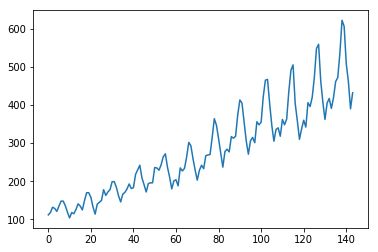

In [12]:
plt.plot(passengersData['#Passengers'].values, label = "Passenger Data")

In [13]:
def isSeriesStationary(series):
    pValue = adfuller(series)[1]
    if pValue > 0.05:
        return False
    else:
        return True

In [14]:
def isSeriesStationaryAvg(series, delta = 2):
    split = int(len(series)/2)
    split1, split2 = series[:split], series[split:]
    avg1, avg2 = split1.mean(), split2.mean()
    var1, var2 = split1.var(), split2.var()
    if abs(avg1 - avg2) > delta or abs(var1 - var2) > delta**2:
        return False
    else:
        return True

In [15]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return np.array(diff)

def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

def describeSeries(data, label):
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(18.5, 10.5)
    plt.plot(data, label = "Series")
    plt.plot(pd.rolling_mean(data, window = 2), '--', label = "Rolling mean")
    plt.plot(pd.rolling_std(data, 2), ":", label = "Rolling Std")
    plt.legend()
    plt.savefig(label)
    plt.clf()

In [16]:
def splitTrainTest(series, testSplit):
    totalData = len(series)
    trainSplit = int(totalData * (1 - testSplit))
    trainSet = series[:trainSplit]
    testSet = series[trainSplit:]
    return trainSet, testSet

In [17]:
isSeriesStationaryAvg(passengersData["#Passengers"].values)

False

In [18]:
isSeriesStationary(passengersData["#Passengers"].values)

False

In [19]:
series = passengersData["#Passengers"].values

series = difference(series, 12)
print(isSeriesStationary(series))

True


In [20]:
trainSet, testSet = splitTrainTest(passengersData['#Passengers'], 0.1)

In [41]:
differencedTrainSet = difference(trainSet, 12) * 1.0

model = ARIMA(differencedTrainSet, order=(1,0,1))
model_fit = model.fit(disp = 0)
forecast = model_fit.predict(len(differencedTrainSet), len(differencedTrainSet) + len(testSet))


yPrediction = []
history = list(trainSet)
for f in forecast:
    yPredict = inverse_difference(history, f, 12)
    yPrediction.append(yPredict)
    history.append(yPredict)

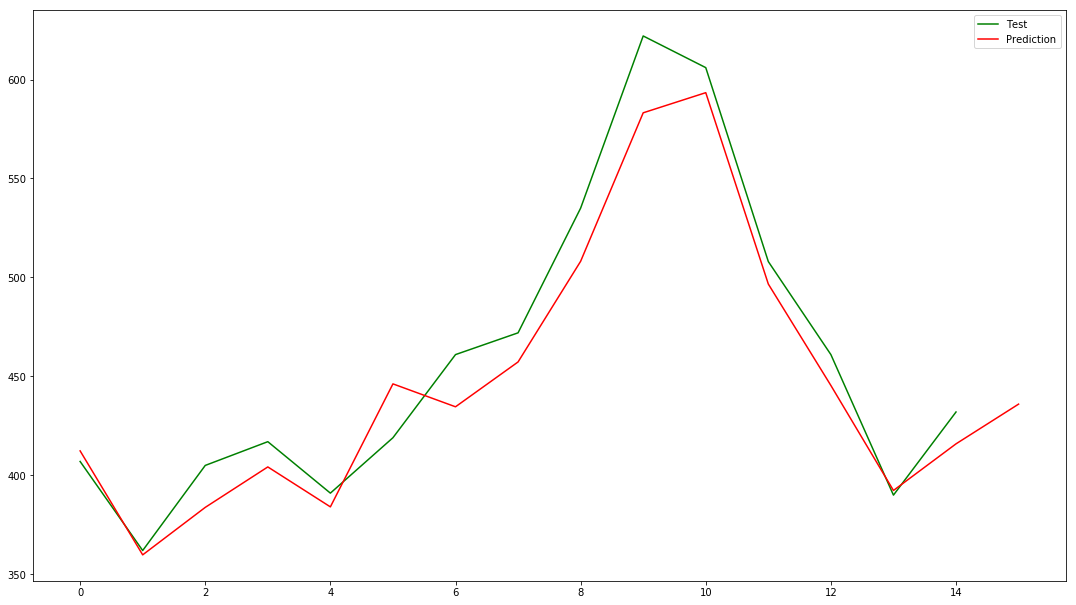

In [42]:
import matplotlib
import matplotlib.pyplot as plt


fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(testSet.values, color='green', label = "Test")
plt.plot(yPrediction, color='red', label = "Prediction")
plt.legend()
plt.savefig("PassengerPrediction.png")
